In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('/Users/awxlong/Desktop/my-studies/hpc_exps/')

In [35]:
# from torchcam.methods import SmoothGradCAMpp
import h5py
import numpy as np
import pickle
from scipy.stats import rankdata
import pdb
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import seaborn as sns

In [4]:
from pytorch_lightning import Trainer
import torch 
from HistoMIL.MODEL.Image.MIL.TransMIL.pl import pl_TransMIL
from HistoMIL.MODEL.Image.MIL.TransMIL.paras import  TransMILParas

from HistoMIL.MODEL.Image.MIL.TransMILMultimodal.pl import pl_TransMILMultimodal
from HistoMIL.MODEL.Image.MIL.TransMILMultimodal.paras import  TransMILMultimodalParas

from HistoMIL.MODEL.Image.MIL.CLAM.pl import pl_CLAM
from HistoMIL.MODEL.Image.MIL.CLAM.paras import  CLAMParas

from HistoMIL.MODEL.Image.MIL.Transformer.pl import pl_Transformer
from HistoMIL.MODEL.Image.MIL.Transformer.paras import  TransformerParas

from HistoMIL.MODEL.Image.MIL.AttentionMIL.pl import pl_AttentionMIL
from HistoMIL.MODEL.Image.MIL.AttentionMIL.paras import  AttentionMILParas


from HistoMIL.MODEL.Image.MIL.DTFD_MIL.pl import pl_DTFD_MIL
from HistoMIL.MODEL.Image.MIL.DTFD_MIL.paras import  DTFD_MILParas


from HistoMIL.MODEL.Image.MIL.CAMIL.pl import pl_CAMIL
from HistoMIL.MODEL.Image.MIL.CAMIL.paras import  CAMILParas


from HistoMIL.MODEL.Image.MIL.TransMILRegression.pl import pl_TransMILRegression
from HistoMIL.MODEL.Image.MIL.TransMILRegression.paras import  TransMILRegressionParas

from HistoMIL.MODEL.Image.MIL.GraphTransformer.pl import pl_GraphTransformer
from HistoMIL.MODEL.Image.MIL.GraphTransformer.paras import GraphTransformerParas

from HistoMIL.DATA.Slide.concepts.WholeSlideImage import WholeSlideImageHeatmap


/Users/awxlong/anaconda3/envs/biomedai/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
wsi_object = WholeSlideImageHeatmap(path='/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/8472de58-9075-4534-b00b-3a87ba2158da/TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs')
label = 0
# pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/tcga_folder_1.TCGA-A8-A085-01Z-00-DX1.2B52D1B8-5AD4-4BD6-ADF7-9D65B8EE2622.svs.pkl'
pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pkl'
with open(pkl_path, 'rb') as f:
    wsi_tissue = pickle.load(f)
wsi_coords = h5py.File('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Patch/224_224/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.h5')
wsi_coords = wsi_coords['coords']

In [10]:
wsi_object.contours_tissue = wsi_tissue['tissue']
wsi_object.holes_tissue = wsi_tissue['holes']

In [17]:
DEFAULT_TRANSMIL_PARAS = TransMILParas()
pl_model = pl_TransMIL(paras=DEFAULT_TRANSMIL_PARAS)
pl_checkpoint = '/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transmil_uni_32epochs_reruncv=1_epoch=07-auroc_val=0.81.ckpt'

DEFAULT_CLAM_PARAS = CLAMParas()
clam = pl_CLAM(paras=DEFAULT_CLAM_PARAS)
clam_chekpoint = '/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transmil_uni_32epochs_reruncv=1_epoch=07-auroc_val=0.81.ckpt'
pl_model = pl_model.load_from_checkpoint(pl_checkpoint)
clam = clam.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_clam_uni_42epochs_cv5cv=1_epoch=14-auroc_val=0.83.ckpt')


# DEFAULT_TRANSFORMER_PARAS = TransformerParas()
# transformer = pl_Transformer(paras=DEFAULT_TRANSFORMER_PARAS)
# transformer = transformer.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transformer_uni_8epochs_smaller_0711_0940cv=2_epoch=07-auroc=0.00.ckpt')

# DEFAULT_ATTMIL_PARAS = AttentionMILParas()
# attmil = pl_AttentionMIL(paras=DEFAULT_ATTMIL_PARAS, dataset_paras=None)
# attmil = attmil.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/attentionMIL_uni_32epoch_reruncv=2_epoch=31-auroc_val=0.70.ckpt')


# # DEFAULT_DTFD_PARAS = DTFD_MILParas()
# # dtfd = pl_DTFD_MIL(paras=DEFAULT_DTFD_PARAS)
# # dtfd = dtfd.to(torch.device('cpu'))
# # dtfd = dtfd.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_dtfd_uni_42epochs_cv5_multisteplrcv=1_epoch=35-auroc_val=0.84.ckpt', map_location=torch.device('cpu'))

DEFAULT_CAMIL_PARAS = CAMILParas()
camil = pl_CAMIL(paras=DEFAULT_CAMIL_PARAS)
camil = camil.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_camil_uni_30epochs_cv5_reducelronplateucv=1_epoch=07-auroc_val=0.82.ckpt')


# DEFAULT_TRANSMILREG_PARAS = TransMILRegressionParas()
# transmil_regression = pl_TransMILRegression(paras=DEFAULT_TRANSMILREG_PARAS)
# transmil_regression = transmil_regression.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transmil_uni_regression_32epochs_cv5_rerun_f1_monitorcv=4_epoch=02-auroc_val=0.39.ckpt')


# DEFAULT_GRAPHTRANSFORMER_PARAS = GraphTransformerParas()
# graphtransformer = pl_GraphTransformer(paras=DEFAULT_GRAPHTRANSFORMER_PARAS)
# graphtransformer = graphtransformer.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_graphtransformer_uni_42epochs_cv5_multisteplrcv=2_epoch=00-auroc_val=0.72.ckpt')

DEFAULT_TRANSMILMULTIMODAL_PARAS = TransMILMultimodalParas()
transmilmultimodal = pl_TransMILMultimodal(paras=DEFAULT_TRANSMILMULTIMODAL_PARAS)
transmilmultimodal = transmilmultimodal.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transmil_uni_multimodal_32epochs_cv5_continuous_onlycv=1_epoch=13-auroc_val=0.79.ckpt')


HistoMIL - INFO - FeatureNet:: Use: pre-calculated 
HistoMIL - INFO - FeatureNet:: Use: pre-calculated 


HistoMIL - INFO - FeatureNet:: Use: pre-calculated 


Using PPEG positional encoding
Using PPEG positional encoding
Using PPEG positional encoding


HistoMIL - INFO - FeatureNet:: Use: pre-calculated 


Using PPEG positional encoding


In [18]:
feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/tiff_2_2_TCGA-3C-JPPQ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff/tiff_folder_2.2_TCGA-3C-JPPQ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni/35e53d2b-8e11-4e5c-ac45-87ea9a504c4b.TCGA-F5-6812-01Z-00-DX1.47a702ae-cfc6-48ea-8ac0-f9ec194cfb6e.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/resnet50/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/74a7137c-ea54-477d-a505-2cf147f3cf24.TCGA-AA-A029-01Z-00-DX1.36BA3129-431D-4AE5-98E6-BA064D0B5062.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/prov-gigapath/0a3de921-dcda-4282-bf55-224bee8000dc.TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff.pt')
feat_adj_matrix = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/resnet50_adj_matrix/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
clinical_feats = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/clinical/test/TCGA-AD-6963.pt')


In [19]:
print(feat_embedding.shape)
feat_embedding[0:3, :]
print(clinical_feats.shape, clinical_feats)
feat_adj_matrix

torch.Size([5668, 1024])
torch.Size([27]) tensor([0.4386, 0.1019, 0.0778, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000])


tensor(indices=tensor([[   0,    0,    0,  ..., 5667, 5667, 5667],
                       [   0,    1,    9,  ..., 5665, 5646, 5660]]),
       values=tensor([0.8699, 0.8188, 0.8699,  ..., 0.8725, 0.7761, 0.7711]),
       size=(5668, 5668), nnz=45344, layout=torch.sparse_coo)

In [20]:
k = 1
with torch.no_grad():
    logits, Y_prob, Y_hat, A, _  = clam.model(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = pl_model.model.infer(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = transformer.model.infer(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = attmil.model.infer(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = dtfd.model.infer(feat_embedding[None])
    with torch.amp.autocast(device_type='cpu'):
        logits, Y_prob, Y_hat, A = camil.model.infer([feat_embedding[None], feat_adj_matrix])
    # logits, Y_prob, Y_hat, A = transmil_regression.model.infer(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = graphtransformer.model.infer(feat_embedding[None], feat_adj_matrix)
    # logits, Y_prob, Y_hat, A, clinical_gradients = transmilmultimodal.model.infer(feat_embedding[None], clinical_feats)
    



In [21]:
A.shape

torch.Size([1, 5668])

In [22]:
k = 1
if A.dim() == 3:
    A = A.mean(-1) # aggregate attention vectors
# Y_hat = Y_hat.item()
A = A.view(-1, 1).cpu().detach().numpy() 
probs, ids = torch.topk(Y_prob, k)
probs = probs[-1].cpu().detach().numpy()
ids = ids[-1].cpu().numpy()
# return ids, preds_str, probs, A as Y_hats, Y_hats_str, Y_probs, A 
Y_hats, Y_probs, A = ids, probs, A

In [24]:
A.shape # should be roughly (#Patches e.g. 5668, 1)
print(feat_adj_matrix.dtype, feat_embedding.dtype)

torch.float32 torch.float32


In [25]:
patch_size = (224, 224)
wsi_ref_downsample = wsi_object.level_downsamples[0]
patch_custom_downsample = 1
vis_patch_size = tuple((np.array(patch_size) * np.array(wsi_ref_downsample) * patch_custom_downsample ).astype(int))
vis_patch_size
overlap = 0
top_left = None
bot_right = None

In [26]:
def to_percentiles(scores):
    
    scores = rankdata(scores, 'average')/len(scores) * 100   
    return scores

def top_k(scores, k, invert=False):
    if invert:
        top_k_ids=scores.argsort()[:k]
    else:
        top_k_ids=scores.argsort()[::-1][:k]
    return top_k_ids

def screen_coords(scores, coords, top_left, bot_right):
    bot_right = np.array(bot_right)
    top_left = np.array(top_left)
    mask = np.logical_and(np.all(coords >= top_left, axis=1), np.all(coords <= bot_right, axis=1))
    scores = scores[mask]
    coords = coords[mask]
    return scores, coords

def sample_indices(scores, k, start=0.48, end=0.52, convert_to_percentile=False, seed=1):
    np.random.seed(seed)
    if convert_to_percentile:
        end_value = np.quantile(scores, end)
        start_value = np.quantile(scores, start)
    else:
        end_value = end
        start_value = start
    score_window = np.logical_and(scores >= start_value, scores <= end_value)
    indices = np.where(score_window)[0]
    if len(indices) < 1:
        return -1 
    else:
        return np.random.choice(indices, min(k, len(indices)), replace=False)

def sample_rois(scores, coords, k=5, mode='range_sample', seed=1, score_start=0.45, score_end=0.55, top_left=None, bot_right=None):

    if len(scores.shape) == 2:
        scores = scores.flatten()

    scores = to_percentiles(scores)
    if top_left is not None and bot_right is not None:
        scores, coords = screen_coords(scores, coords, top_left, bot_right)

    if mode == 'range_sample':
        sampled_ids = sample_indices(scores, start=score_start, end=score_end, k=k, convert_to_percentile=False, seed=seed)
    elif mode == 'topk':
        sampled_ids = top_k(scores, k, invert=False)
    elif mode == 'reverse_topk':
        sampled_ids = top_k(scores, k, invert=True)
    else:
        raise NotImplementedError
    # pdb.set_trace()
    coords = coords[:][sampled_ids]
    scores = scores[sampled_ids]

    asset = {'sampled_coords': coords, 'sampled_scores': scores}
    return asset

In [27]:
samples = [{'name': 'topk_high_attention', 'sample': True, 'seed': 42, 'k': 15, 'mode': 'topk'}]

In [28]:
# label, Y_hats[0]
sampled_patches_dir = f"/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap/Camil_UNI/"
patch_level = 0
patch_size = (224, 224)
slide_id = 'TCGA-AD-6963'

In [29]:
for sample in samples:
    if sample['sample']:
        tag = "label_{}_pred_{}".format(label, Y_hat)
        sample_save_dir =  os.path.join(sampled_patches_dir, 'sampled_patches', str(tag), sample['name'])
        os.makedirs(sample_save_dir, exist_ok=True)
        print('sampling {}'.format(sample['name']))
        sample_results = sample_rois(scores=A, coords=wsi_coords, k=sample['k'], mode=sample['mode'], seed=sample['seed'], 
            score_start=sample.get('score_start', 0), score_end=sample.get('score_end', 1))
        for idx, (s_coord, s_score) in enumerate(zip(sample_results['sampled_coords'], sample_results['sampled_scores'])):
            print('coord: {} score: {:.3f}'.format(s_coord, s_score))
            patch = wsi_object.wsi.read_region(tuple(s_coord), patch_level, patch_size).convert('RGB')
            patch.save(os.path.join(sample_save_dir, '{}_{}_x_{}_y_{}_a_{:.3f}.png'.format(idx, slide_id, s_coord[0], s_coord[1], s_score)))

sampling topk_high_attention
coord: [1168 6128] score: 100.000
coord: [9904 1872] score: 99.982
coord: [12144  5904] score: 99.965
coord: [13712 12400] score: 99.947
coord: [25136 13072] score: 99.929
coord: [12592  6128] score: 99.912
coord: [24688 12848] score: 99.894
coord: [11472  3216] score: 99.876
coord: [25136 13520] score: 99.859
coord: [12816 13520] score: 99.841
coord: [13488 12400] score: 99.824
coord: [11696  4112] score: 99.806
coord: [14832 10608] score: 99.788
coord: [11024  3664] score: 99.771
coord: [24240 12400] score: 99.753


In [30]:
heatmap_vis_args = {'convert_to_percentiles': True, 'blur': True, 'custom_downsample': 1}


creating heatmap for: 
top_left:  (0, 0) bot_right:  (31655, 25773)
w: 1978, h: 1610
scaled patch size:  [14 14]

computing foreground tissue mask
detected 1062183/3184580 of region as tissue

computing heatmap image
total of 5668 patches
progress: 1132/5668
progress: 2265/5668
progress: 3398/5668
progress: 4531/5668
progress: 5664/5668
Done

computing blend
using block size: 1024 x 1024


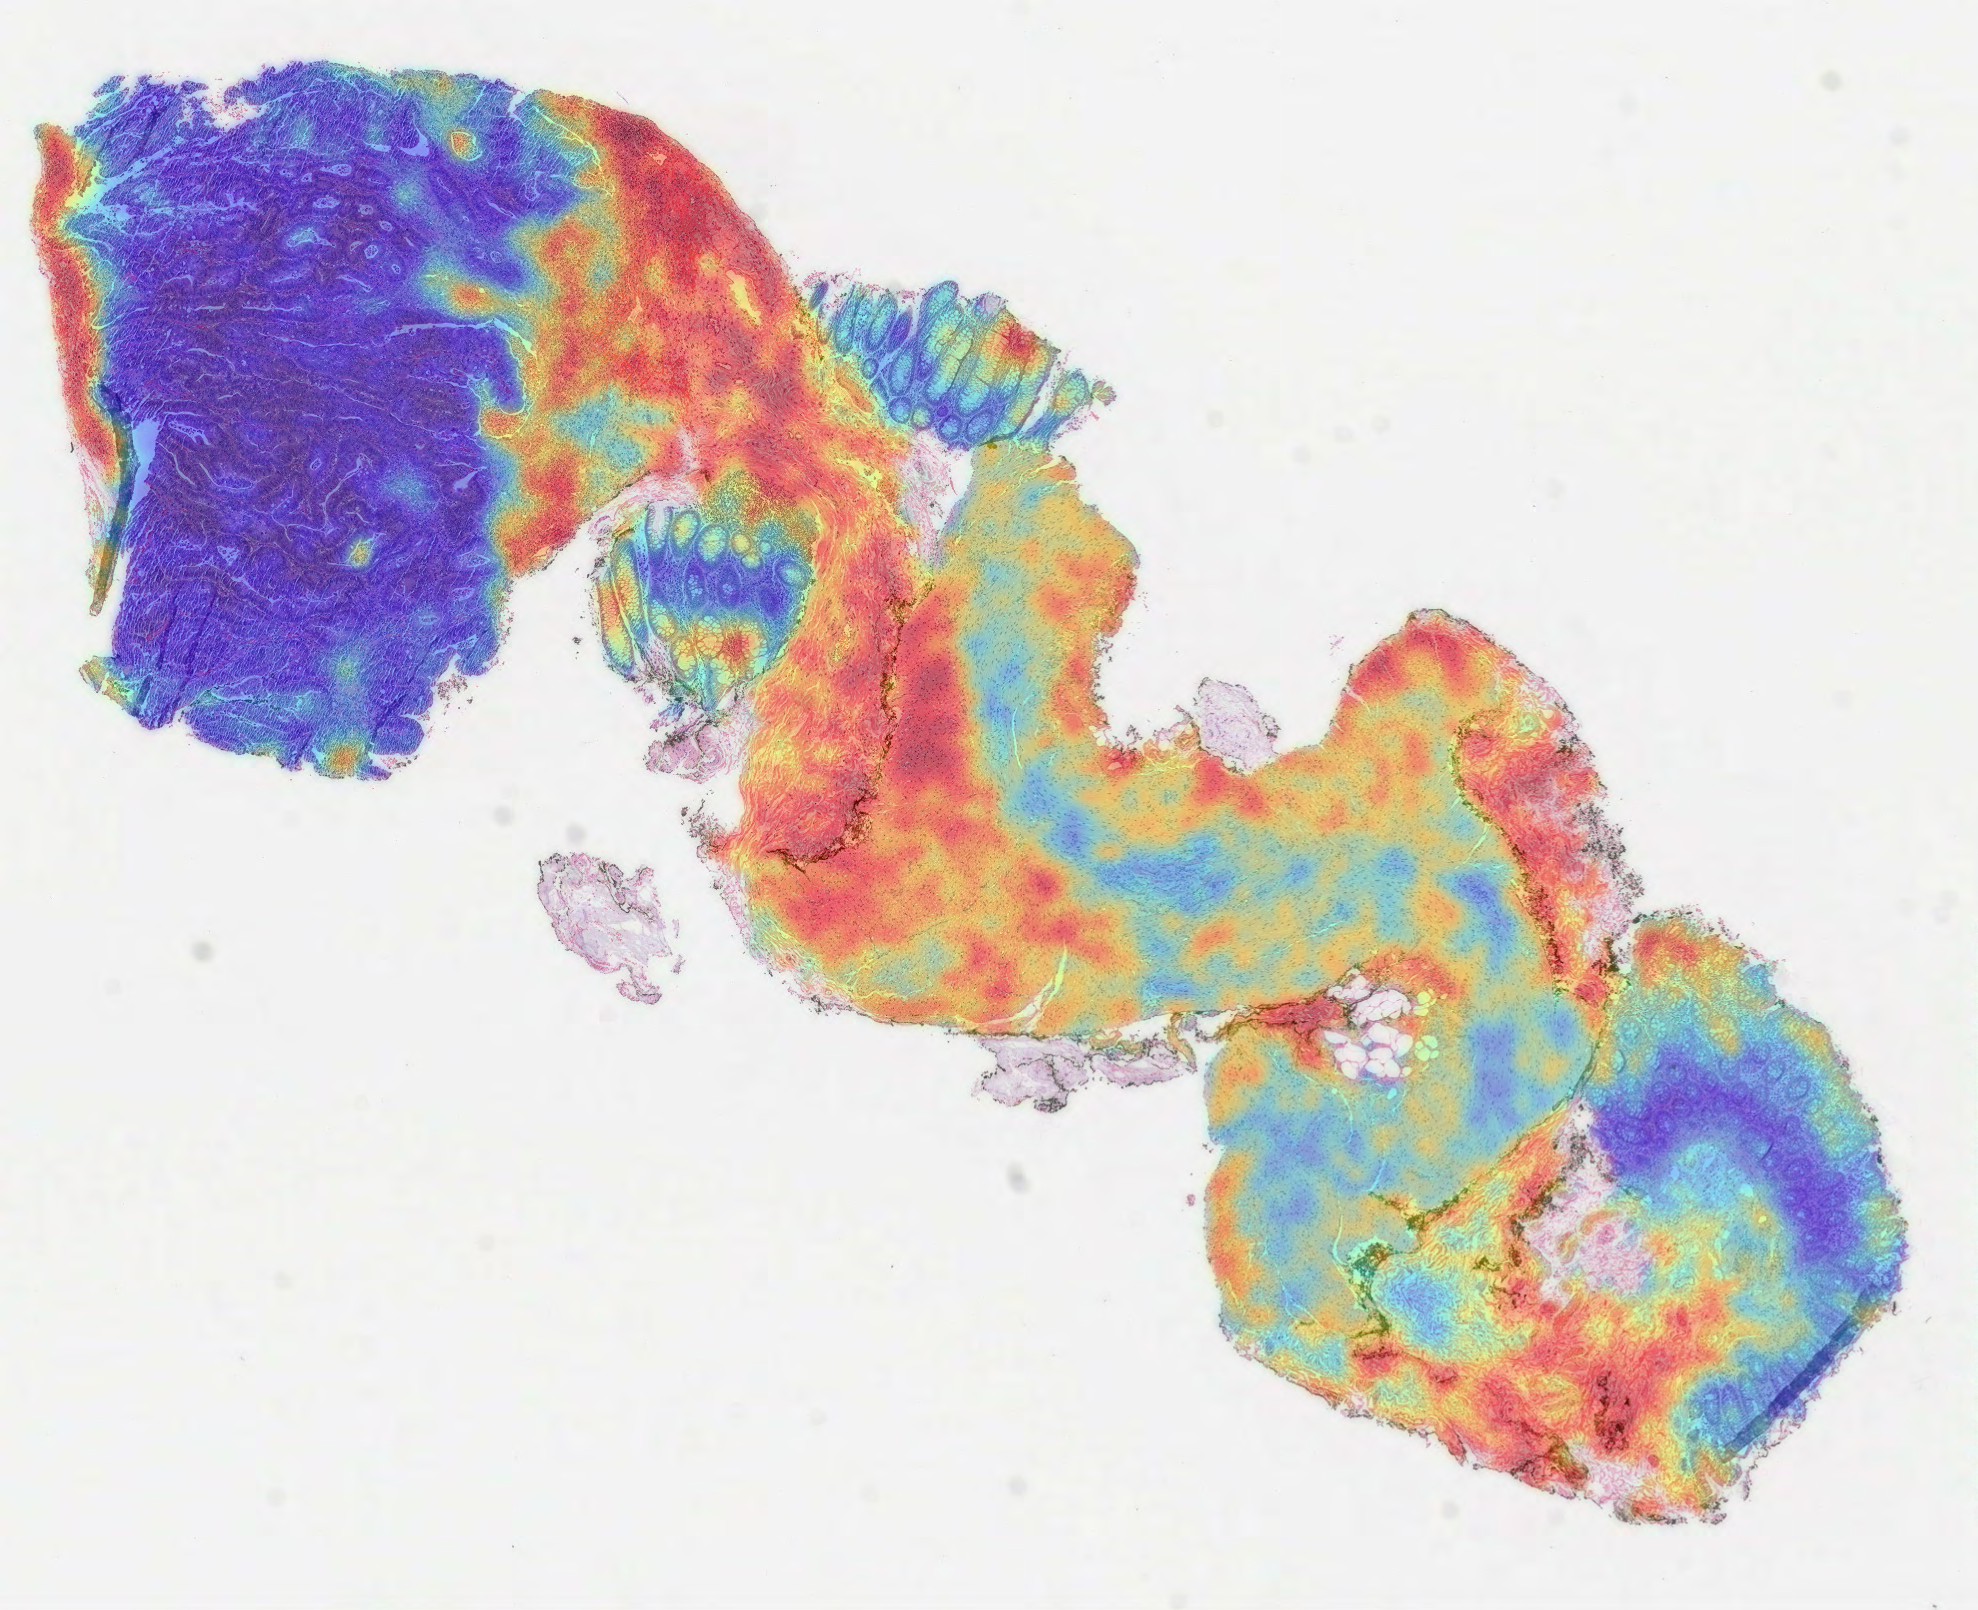

In [34]:
heatmap = wsi_object.visHeatmap(scores=A, coords=wsi_coords, vis_level=-1,  
                                cmap='jet', alpha=0.42, **heatmap_vis_args, 
                                binarize=False, blank_canvas=False,
                                thresh=-1,  patch_size = vis_patch_size,
                                overlap=overlap, top_left=top_left, bot_right = bot_right)
heatmap

In [179]:
heatmap.save(os.path.join('heatmap_dir/', 'filename.jpg'), quality=100)

### Tissue tesselation visualization (optional):


creating heatmap for: 
top_left:  (0, 0) bot_right:  (31655, 25773)
w: 1978, h: 1610
scaled patch size:  [14 14]

computing foreground tissue mask
detected 1062183/3184580 of region as tissue

computing heatmap image
total of 5668 patches
progress: 1132/5668
progress: 2265/5668
progress: 3398/5668
progress: 4531/5668
progress: 5664/5668
Done

computing blend
using block size: 1024 x 1024


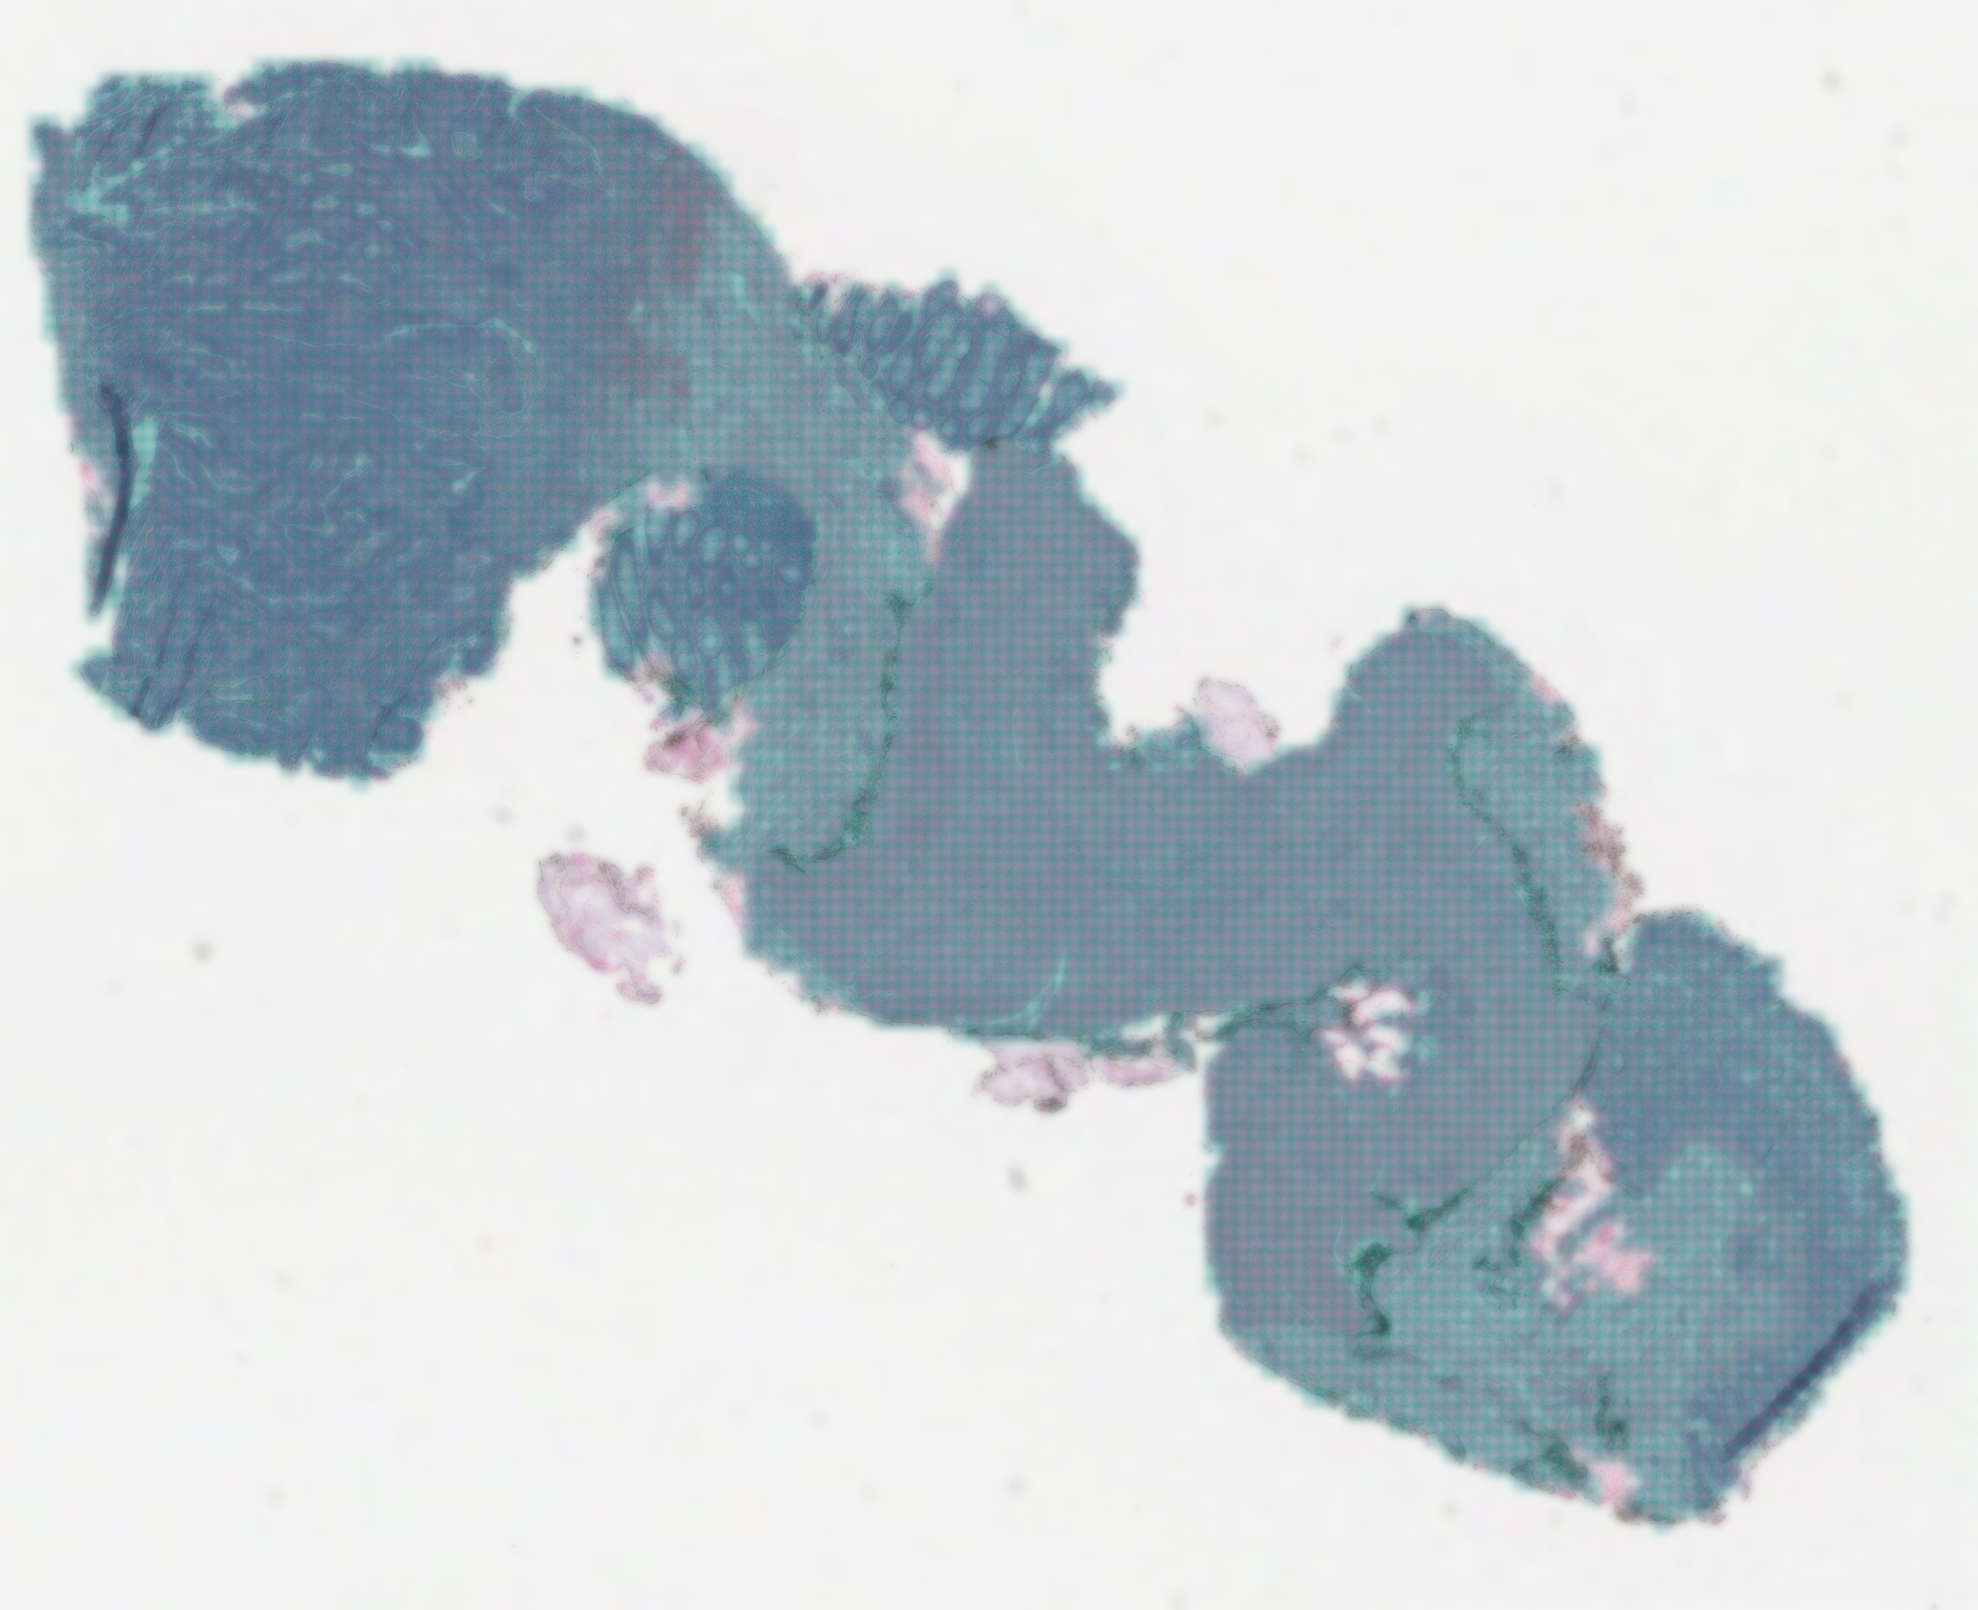

In [33]:
A_null = np.zeros_like(A)
patches = wsi_object.drawPatchBoxes(scores=A_null, coords=wsi_coords, vis_level=-1,  
                                cmap='jet', alpha=0.9, **heatmap_vis_args, 
                                binarize=False, blank_canvas=False,
                                thresh=-1,  patch_size = vis_patch_size,
                                overlap=overlap, top_left=top_left, bot_right = bot_right)
patches

In [ ]:
patches.save(os.path.join('path_to_heatmap/', 'downsample_patches_wsi.jpg'), quality=100)

# Adj. Matrix Visualization

In [36]:
adj_matrix = torch.load('path_to_adj_matrix.pt').to_dense()
adj_matrix = adj_matrix[0:4, 0:4]


/var/folders/5g/t9d5_kvd3kb4yljp4f0pvqqc0000gn/T/ipykernel_5274/117694134.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout for better appearance


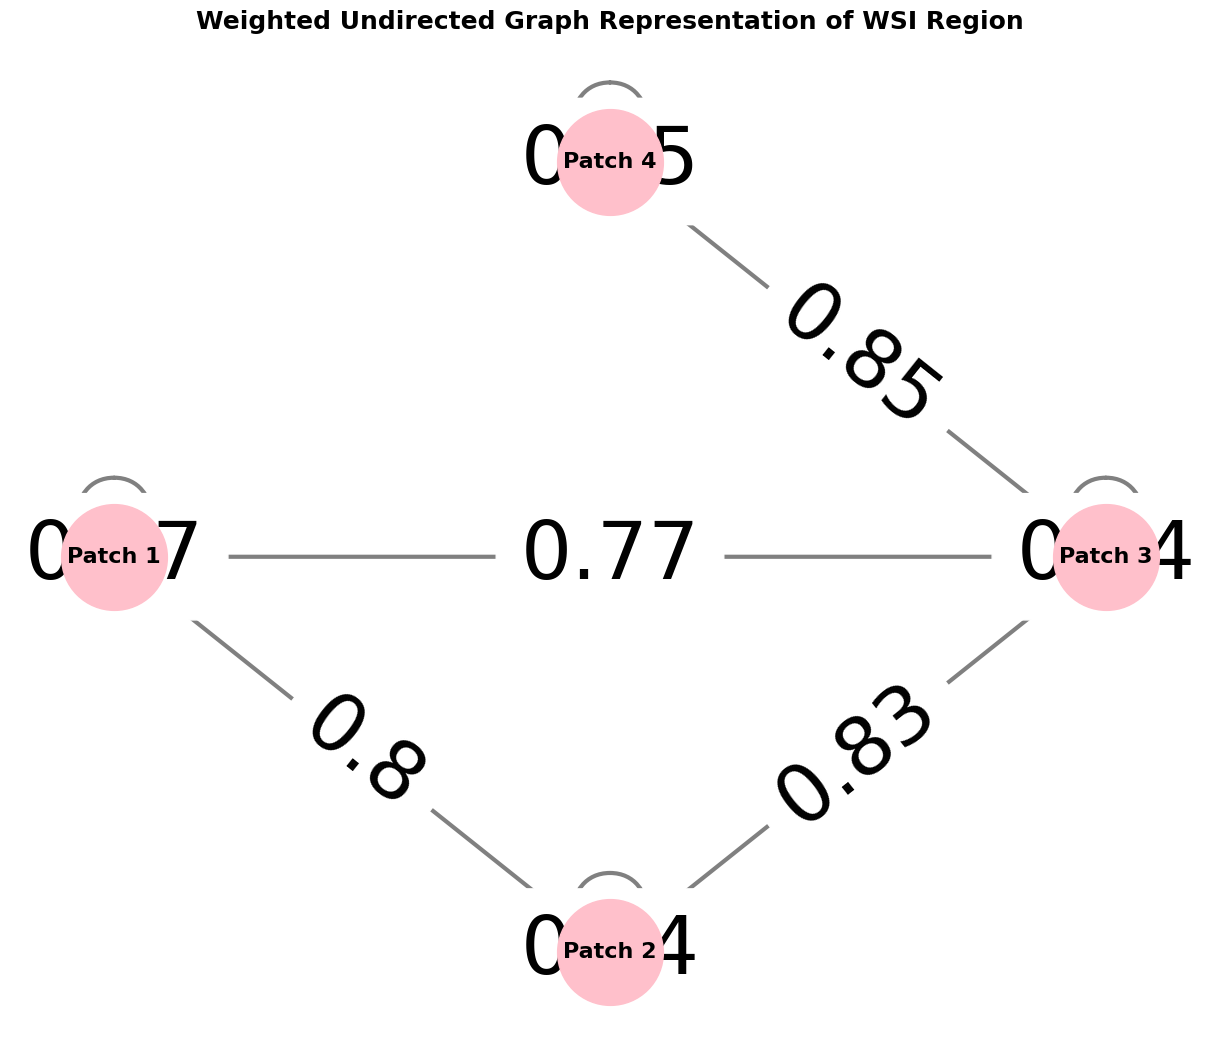

In [38]:
# Example node labels representing patches in a WSI
np_adj = adj_matrix.cpu().numpy()

node_labels = {0: 'Patch 1', 1: 'Patch 2', 2: 'Patch 3', 3: 'Patch 4'}

G = nx.from_numpy_array(np_adj, create_using=nx.Graph)

# Set the positions of the nodes using shell layout
pos = nx.shell_layout(G)

# Draw the graph with thicker edges and larger nodes
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=5800, node_color='pink', 
        font_size=16, font_weight='bold', edge_color='gray', width=3)

# Draw edge labels with weights, rounded to 2 decimals
edge_labels = nx.get_edge_attributes(G, 'weight')
rounded_edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=rounded_edge_labels, font_color='k', font_size=58)

# Set title and show the plot
plt.title('Weighted Undirected Graph Representation of WSI Region', fontsize=18, fontweight='bold')
plt.axis('off')  # Hide axes
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


# visualize_weighted_adjacency_matrix(np_adj, node_labels)


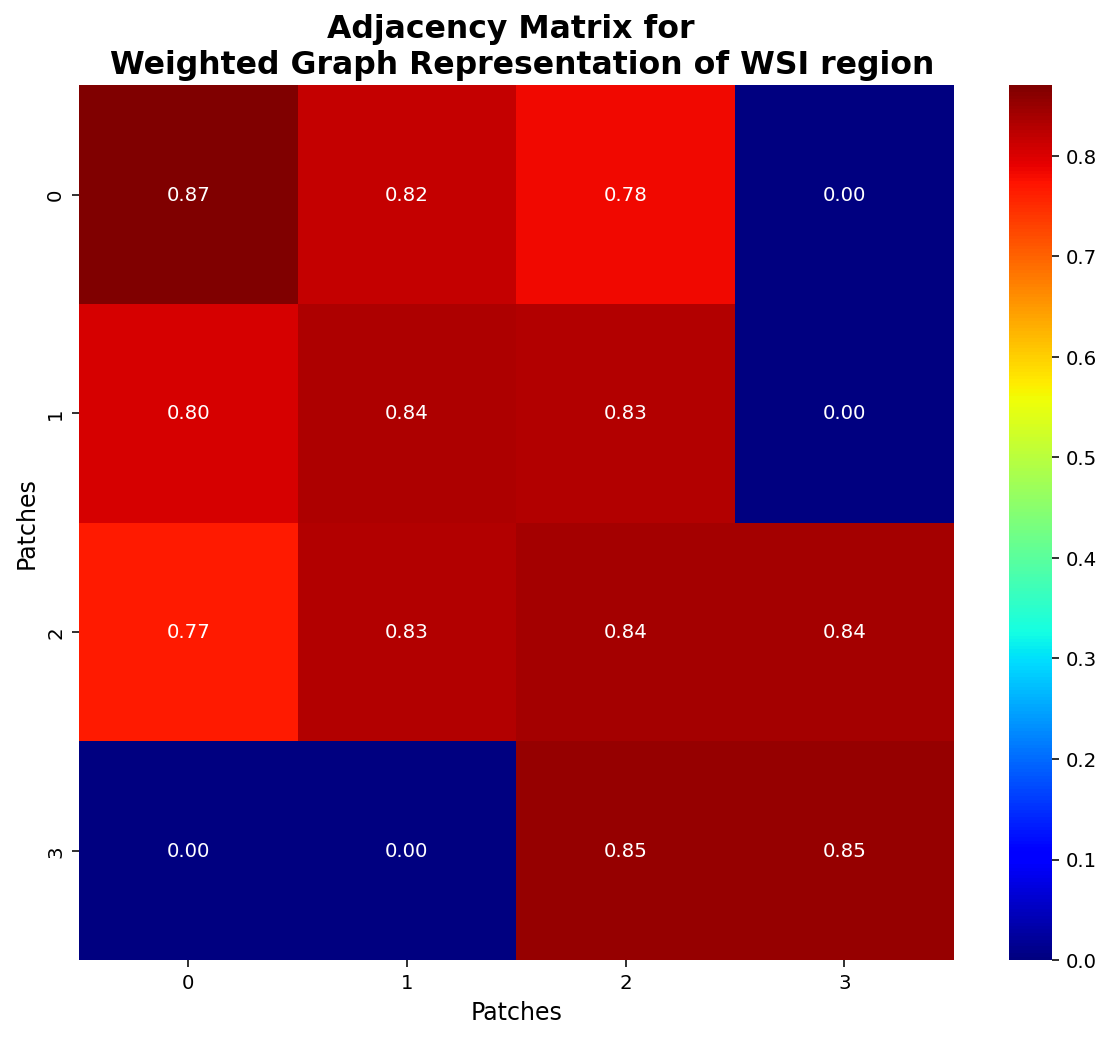

In [39]:

def plot_heatmap(np_adj):
    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8), dpi=142)
    sns.heatmap(np_adj, annot=True, fmt=".2f", cmap='jet', cbar=True, square=True, 
                xticklabels=np.arange(np_adj.shape[1]), yticklabels=np.arange(np_adj.shape[0]))
    
    # Set titles and labels
    plt.title('Adjacency Matrix for \n Weighted Graph Representation of WSI region', fontsize=16, fontweight='bold')
    plt.xlabel('Patches', fontsize=12)
    plt.ylabel('Patches', fontsize=12)
    plt.show()

plot_heatmap(np_adj)

# Clinical features visualization using Integrated Gradients

Integrated gradients is a gradient-based, feature attribution method from https://arxiv.org/abs/1703.01365

In [40]:
grad_dir = 'path_to_integrated_grads.npy'
# List to hold the loaded .npy files
npy_files = []

# Iterate over files in the specified directory
for filename in os.listdir(grad_dir):
    if filename.endswith('.npy'):
        # Construct full file path
        file_path = os.path.join(grad_dir, filename)
        # Load the .npy file
        data = np.load(file_path)
        npy_files.append(data)

In [41]:
# clinical_gradients.detach().cpu().numpy()
clinical_gradients = np.vstack(npy_files)
print(clinical_gradients.shape)


(58, 27)


In [42]:
test = pd.read_csv('path_to_clinical/test/test.csv')

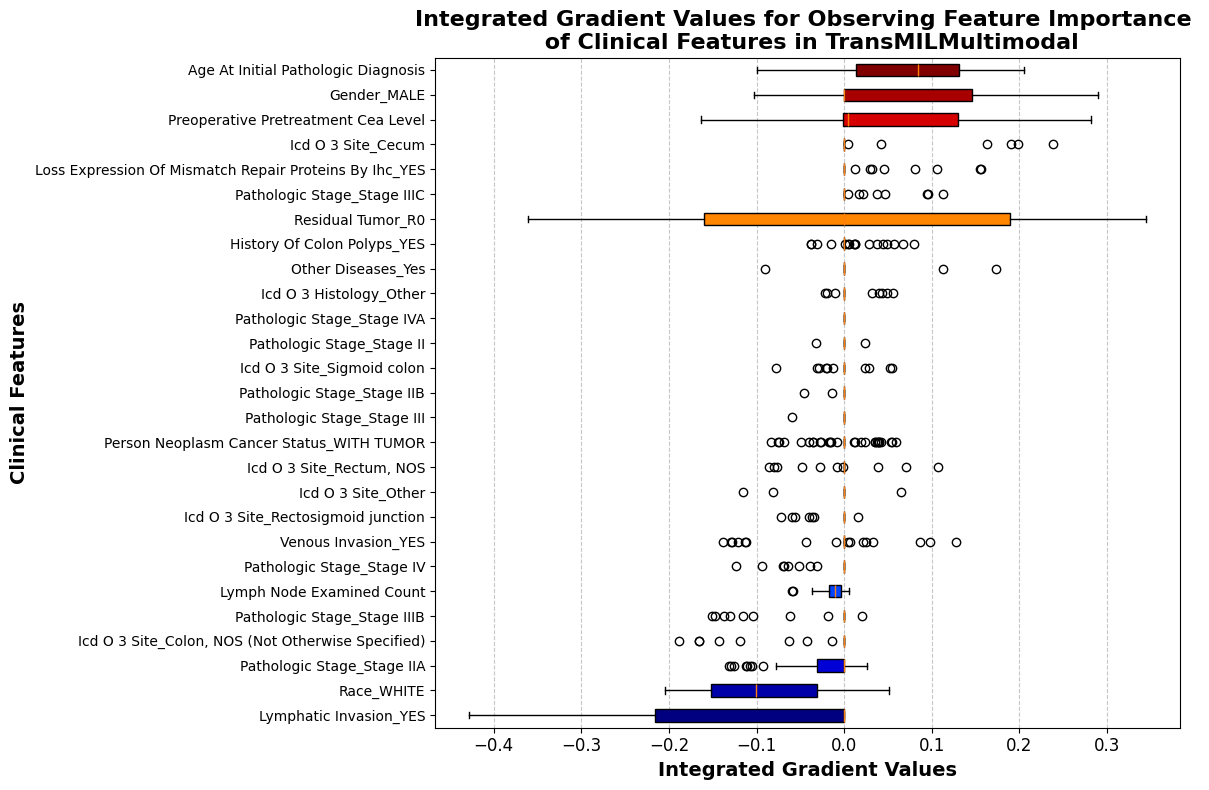

In [44]:

# Get feature names from the DataFrame
feature_names = test.columns[2:-1].values
feature_names = np.where(feature_names == 'Other Dx_Yes', 'Other Diseases_Yes', feature_names)

# Calculate means for each feature
means = np.mean(clinical_gradients, axis=0)

# Sort features by means
sorted_indices = np.argsort(means)
sorted_gradients = clinical_gradients[:, sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Generate colors based on the sorted order using the jet colormap
num_features = len(sorted_feature_names)
colors = plt.cm.jet(np.linspace(0, 1, num_features))

# Create horizontal box plots for each feature
plt.figure(figsize=(12, 8))

# Create a horizontal box plot for each of the sorted features
box = plt.boxplot(sorted_gradients, vert=False, labels=sorted_feature_names, patch_artist=True)

# Color the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add titles and labels with increased font sizes
plt.title('Integrated Gradient Values for Observing Feature Importance \n of Clinical Features in TransMILMultimodal', fontsize=16, fontweight='bold' )
plt.xlabel('Integrated Gradient Values', fontsize=14, fontweight='bold')
plt.ylabel('Clinical Features', fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure as a high-resolution image suitable for publication
plt.savefig('boxplot_clinical_features_IG_TransMILMultimodal.png', dpi=224, bbox_inches='tight')

# Show the plot
plt.show()

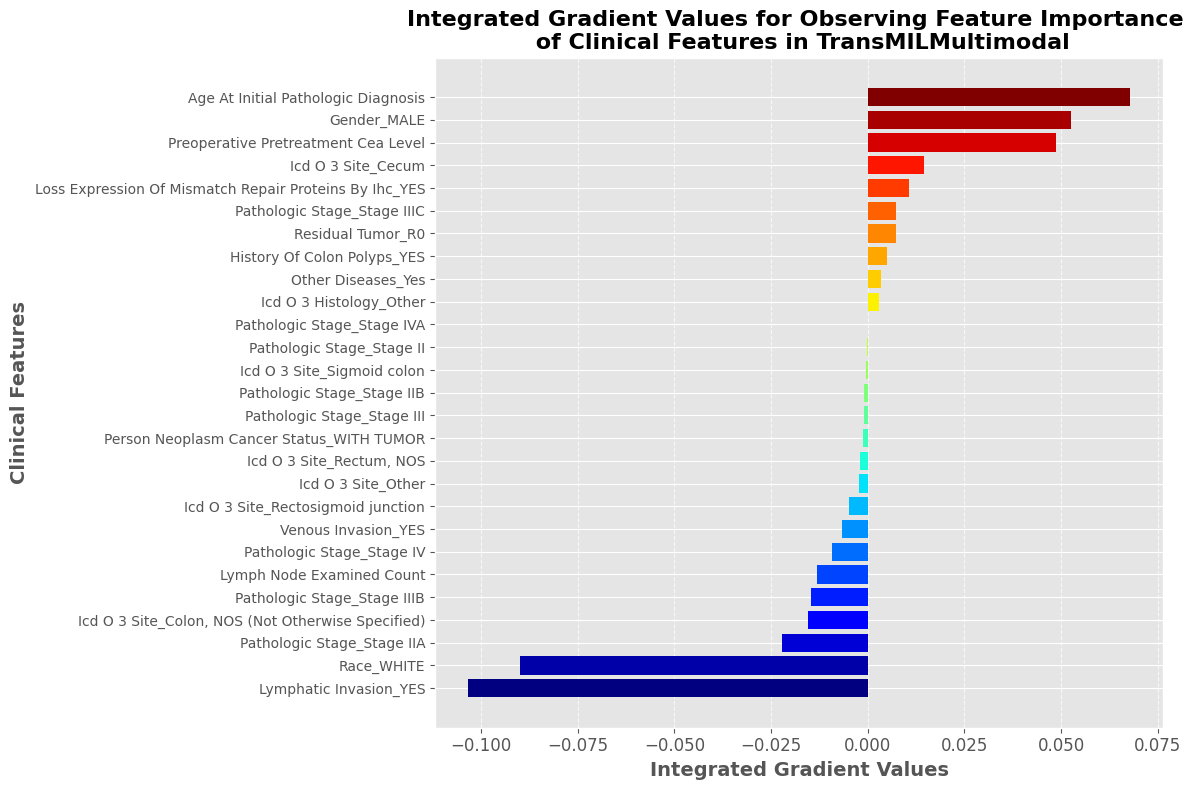

In [45]:
# Assuming feature_importance_df is already defined and contains the necessary data

# Set the figure size and style
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')  # Use a built-in Matplotlib style
# You can use a colormap from Matplotlib or define your own list of colors
# num_features = len(feature_importance_df)
colors = plt.cm.jet(np.linspace(0, 1, num_features))  # Using the 'viridis' colormap
# Create a horizontal bar plot
plt.barh(sorted_feature_names, np.mean(sorted_gradients, axis=0), color=colors)

# Add titles and labels with increased font sizes
plt.title('Integrated Gradient Values for Observing Feature Importance \n of Clinical Features in TransMILMultimodal', fontsize=16, fontweight='bold' )
plt.xlabel('Integrated Gradient Values', fontsize=14, fontweight='bold')
plt.ylabel('Clinical Features', fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('clinical_grads_bar_transmilmultimodal.png', dpi=224, bbox_inches='tight')  # Save as PNG with high DPI

# Show the plot
plt.show()